<a href="https://colab.research.google.com/github/kingajutrzenka/case-study/blob/main/Dog%20Intelligence%20Comparison%20Based%20on%20Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dog Intelligence Comparison Based on Size**

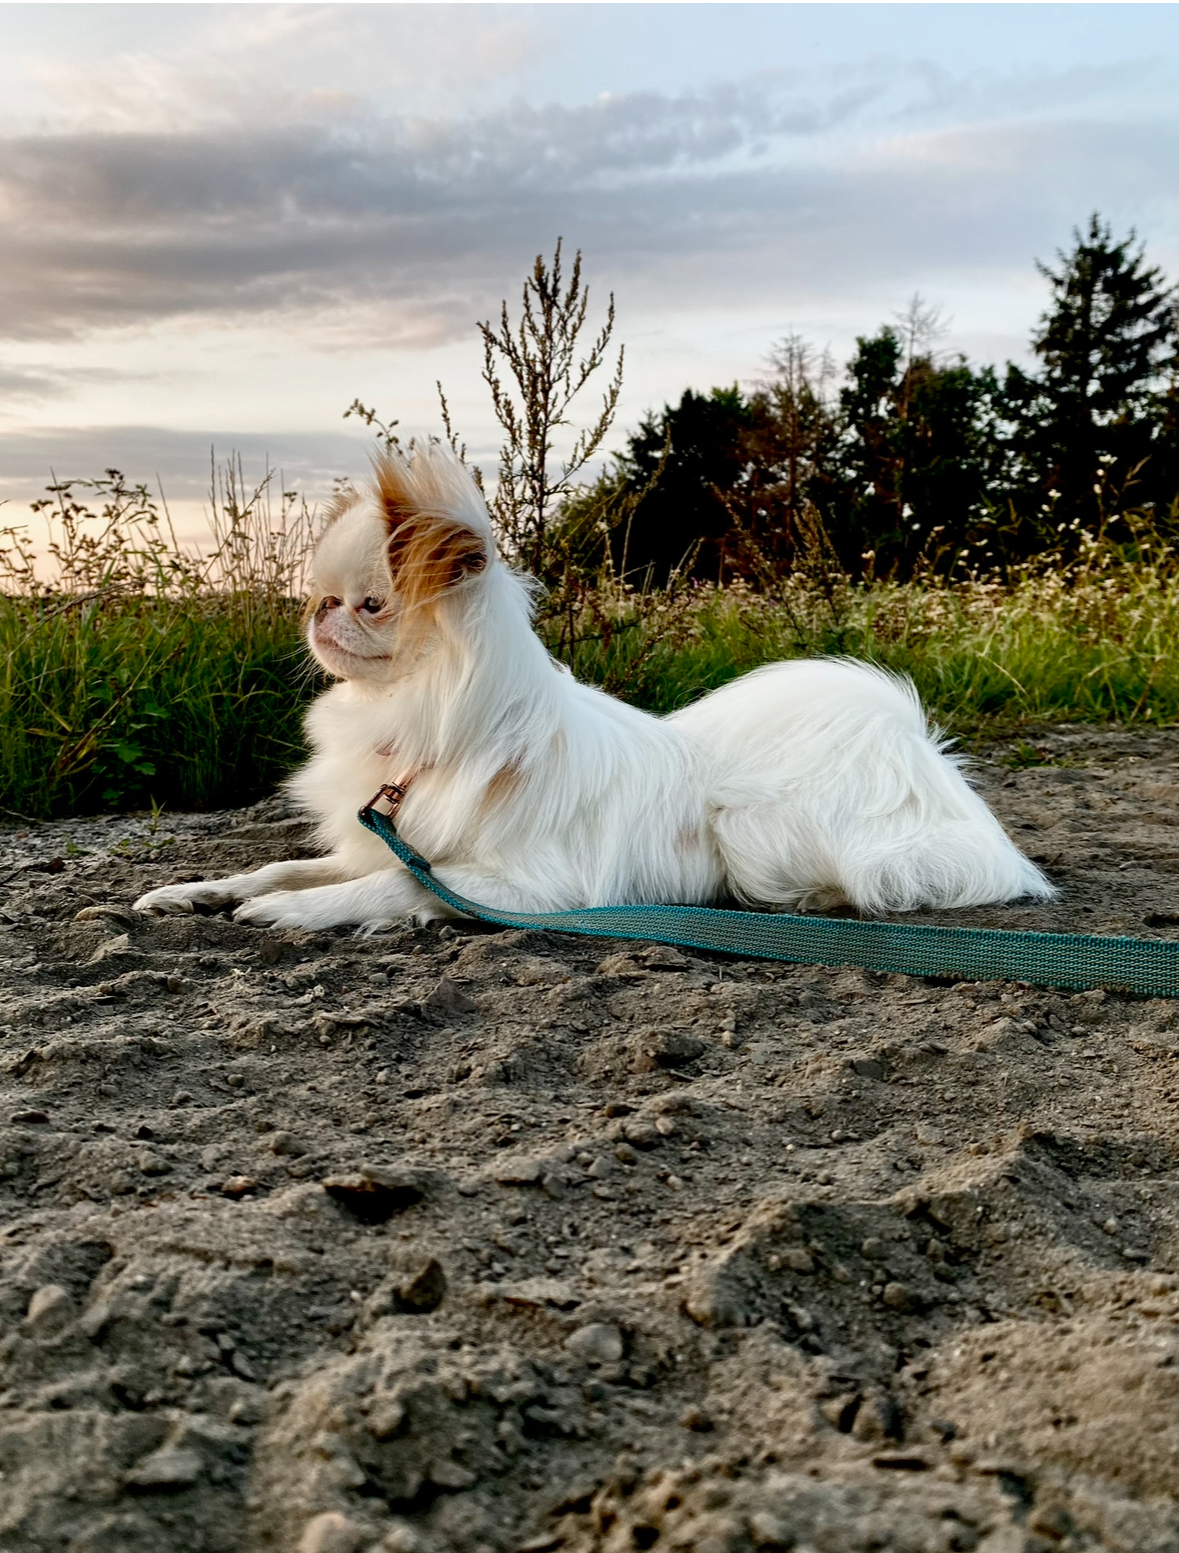

**My dog :)**

# Data cleaning & about data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('Dog Intelligence.csv', encoding='latin-1')
df

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
0,Akita,26.0,28.0,80,120,1.0,4.0
1,A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0
2,Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0
3,Bloodhound,24.0,26.0,80,120,1.0,4.0
4,Borzoi,26.0,28.0,70,100,1.0,4.0
...,...,...,...,...,...,...,...
145,Papillon,8.0,11.0,5,10,NaN,NaN
146,Pomeranian,12.0,12.0,3,7,NaN,NaN
147,Poodle Toy,10.0,10.0,10,10,NaN,NaN
148,Toy Fox Terrier,10.0,10.0,4,7,NaN,NaN


In [8]:
df = df.dropna()
df

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
0,Akita,26.0,28.0,80,120,1.0,4.0
1,A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0
2,Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0
3,Bloodhound,24.0,26.0,80,120,1.0,4.0
4,Borzoi,26.0,28.0,70,100,1.0,4.0
...,...,...,...,...,...,...,...
131,Silky Terrier,9.0,10.0,8,11,81.0,100.0
132,Skye Terrier,10.0,10.0,25,25,81.0,100.0
133,Tibetan Spaniel,10.0,10.0,9,15,81.0,100.0
134,Tibetan Terrier,14.0,17.0,20,30,81.0,100.0


**About this file from kaggle!**

- breed:The breed of the dogs considered in the experiment.
- reps_lower: The lower limit of repetitions to understand new commands.
- reps_upper: The upper limit of repetitions to understand new commands.
- height_low_inches: The lower limit of the height of the dogs in inches.
- height_high_inches: The upper limit of the height of the dogs in inches.
- weight_low_lbs: The lower limit of the weight of the dogs in pounds.
- weight_high_lbs: The upper limit of the weight of the dogs in pounds.

# Data manipulation

In [9]:
df.keys()

Index(['Breed', 'height_low_inches', 'height_high_inches', 'weight_low_lbs',
       'weight_high_lbs', 'reps_lower', 'reps_upper'],
      dtype='object')

In [10]:
df['reps_lower'].corr(df['height_high_inches'])

np.float64(-0.5933332032748687)

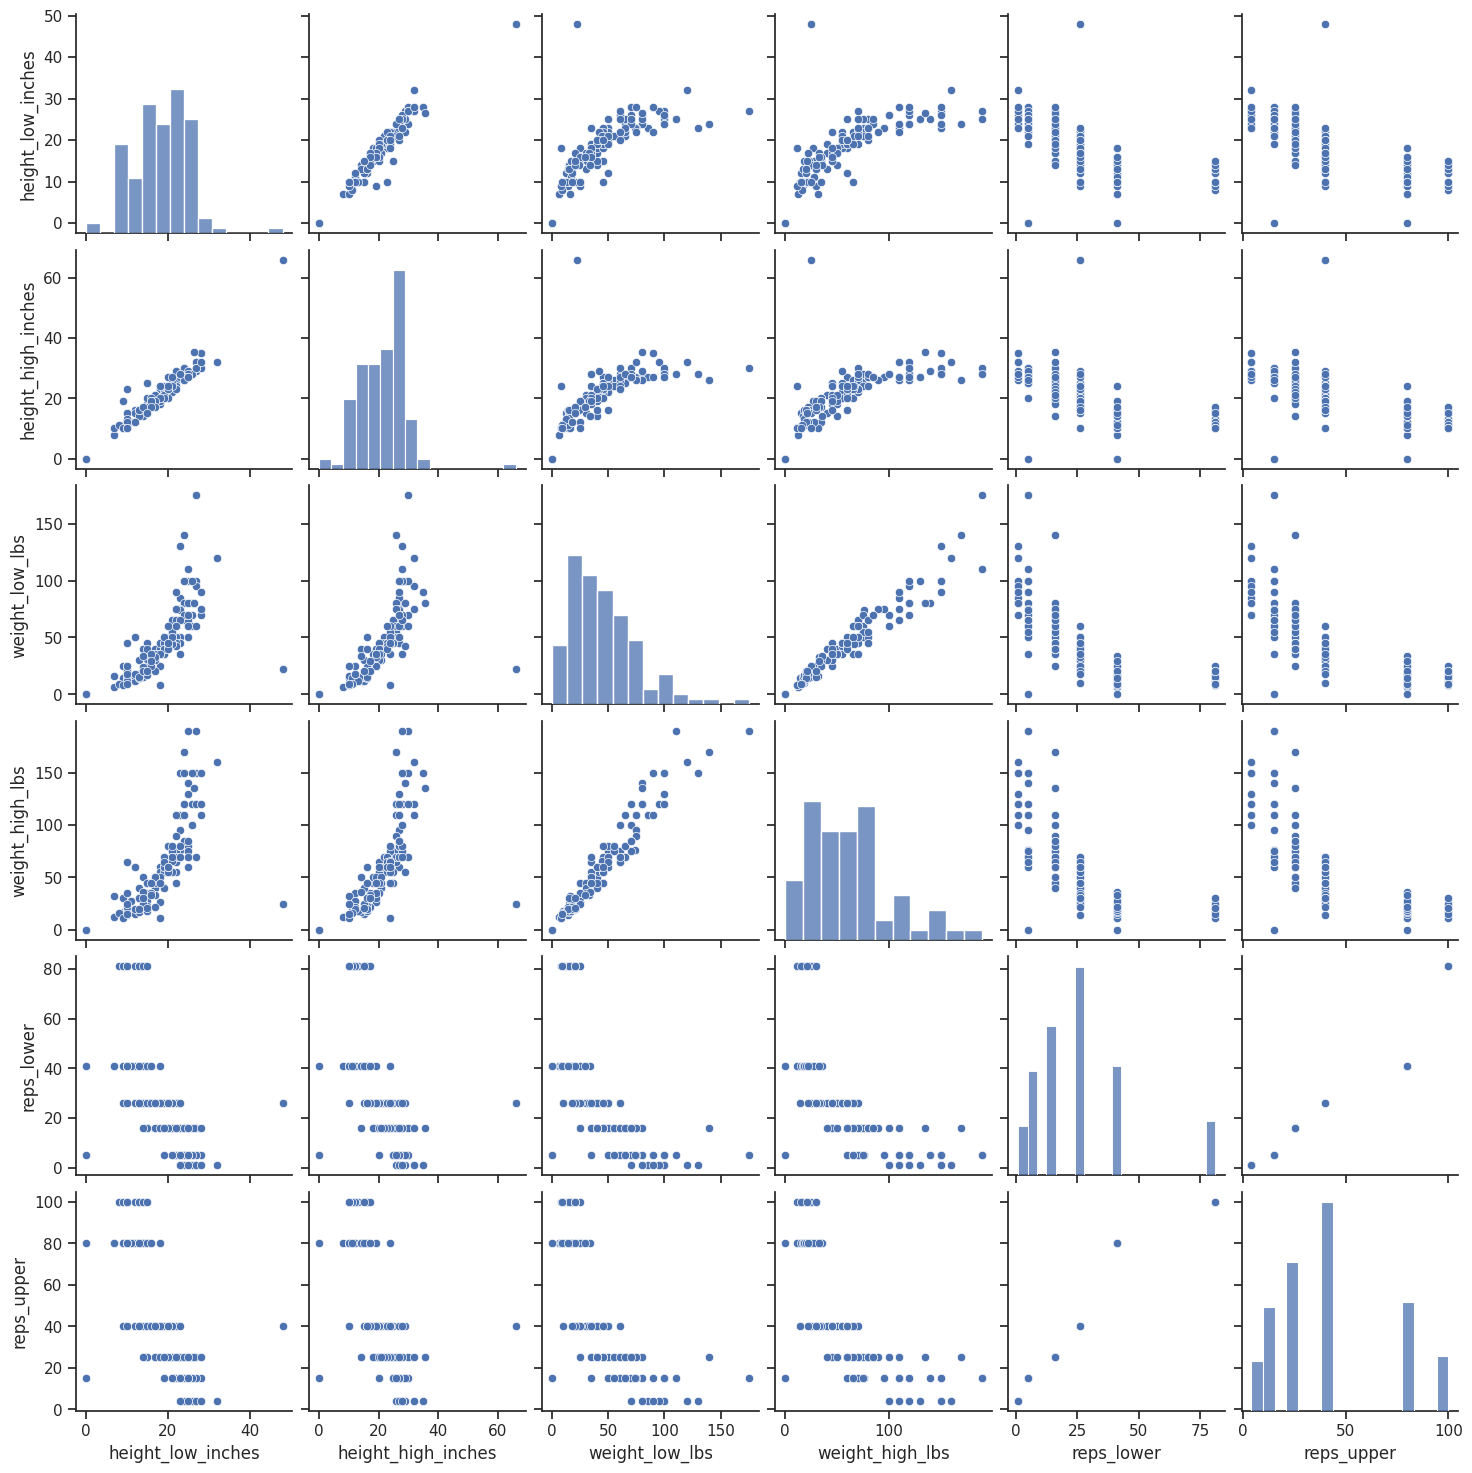

In [11]:
sns.set_theme(style='ticks')
sns.pairplot(df)

In this analysis I don't see a correlation between reps_lower/ reps_higher and dogs height and weight :/

In [12]:
# ANOVA (Analysis of Variance)
import pandas as pd
from scipy import stats

grupy = [df[df['reps_lower'] == g]['height_high_inches'] for g in df['reps_lower'].unique()]

stat, p_value = stats.f_oneway(*grupy)

print(f'p-value = {p_value}')

if p_value < 0.05:
    print('The results are statistically significant.')
else:
    print('The results are not statistically significant.')

p-value = 2.8001008333527024e-15
The results are statistically significant.


In this analysis whereas I see statistically significant dependence between dog height and number of reps.

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['height_high_inches'],
                          groups=df['reps_lower'],
                          alpha=0.05)
print(tukey)

# meandiff - the diffrence between dog's height

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   1.0    5.0  -3.6286 0.5931 -10.1454  2.8882  False
   1.0   16.0    -3.95 0.4409 -10.1435  2.2435  False
   1.0   26.0  -7.5333  0.005 -13.5015 -1.5652   True
   1.0   41.0 -15.7227    0.0 -22.1916 -9.2539   True
   1.0   81.0 -16.2909    0.0 -23.7019 -8.8799   True
   5.0   16.0  -0.3214    1.0  -5.1473  4.5045  False
   5.0   26.0  -3.9048 0.1342  -8.4379  0.6284  False
   5.0   41.0 -12.0942    0.0 -17.2688 -6.9196   True
   5.0   81.0 -12.6623    0.0 -18.9753 -6.3494   True
  16.0   26.0  -3.5833 0.1158  -7.6379  0.4712  False
  16.0   41.0 -11.7727    0.0 -16.5337 -7.0118   True
  16.0   81.0 -12.3409    0.0 -18.3195 -6.3623   True
  26.0   41.0  -8.1894    0.0 -12.6533 -3.7255   True
  26.0   81.0  -8.7576 0.0003 -14.5024 -3.0127   True
  41.0   81.0  -0.5682 0.9998  -6.8316  5.6953  False
----------------------------

The Tukey test showed that some groups are statistically different from others:

	•	Dogs that needed only 1 repetition were significantly different in height from those needing 26, 41, and 81 repetitions.
	•	Dogs that needed 5 repetitions were also different from those needing 41 and 81 repetitions.
	•	Dogs in group 16 were different from group 41, and group 26 was different from group 81.

In most of these cases, the difference (meandiff) was negative, which means that dogs who learned faster (fewer repetitions) were usually shorter than dogs who needed more time.

So, the results suggest that bigger dogs may learn commands faster than smaller dogs. But not all groups were different – some had similar results (marked as reject = False).

<Axes: xlabel='reps_lower', ylabel='height_high_inches'>

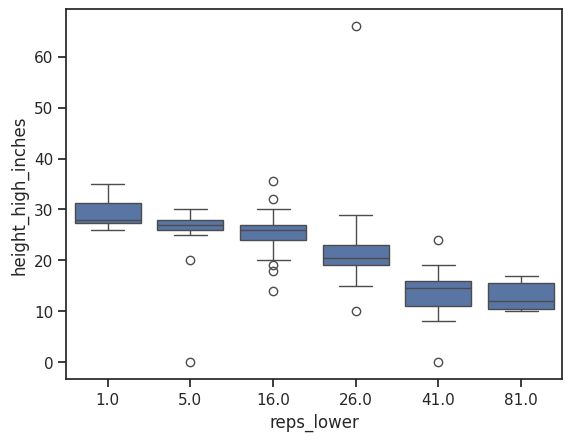

In [14]:
import seaborn as sns
sns.boxplot(x='reps_lower', y='height_high_inches', data=df)

This analysis confirm least analysis. Bigger dogs learn avarage faster than smaller dogs 🐕.